In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 학습 모델 저장을 위한 라이브러리
import pickle

In [2]:
df = pd.read_csv("05.잔액정보_컬럼선택.csv")
df

,평잔_일시불_해외_6M,잔액_일시불_B2M,잔액_일시불_B1M,잔액_일시불_B0M,평잔_일시불_3M,월중평잔_일시불,월중평잔_일시불_B0M,평잔_일시불_6M,Segment
0,0,1083,736,998,1791,1503,1084,2440,3
1,0,1424,6795,2565,3761,4447,4090,2677,4
2,0,6143,5150,5312,6796,5540,5006,9118,2
3,0,708,462,730,772,606,487,884,3
4,0,0,0,0,0,0,0,21,4
...,...,...,...,...,...,...,...,...,...
2399995,0,0,0,0,0,0,0,0,4
2399996,0,4362,4142,3351,9424,5515,4412,12524,3
2399997,0,2898,1523,2524,2998,3046,2694,3241,2
2399998,0,0,0,0,0,0,0,0,4


In [3]:
df['Segment'] = df['Segment'].astype('category')

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 9 columns):
 #   Column        Dtype   
---  ------        -----   
 0   평잔_일시불_해외_6M  int64   
 1   잔액_일시불_B2M    int64   
 2   잔액_일시불_B1M    int64   
 3   잔액_일시불_B0M    int64   
 4   평잔_일시불_3M     int64   
 5   월중평잔_일시불      int64   
 6   월중평잔_일시불_B0M  int64   
 7   평잔_일시불_6M     int64   
 8   Segment       category
dtypes: category(1), int64(8)
memory usage: 148.8 MB


,평잔_일시불_해외_6M,잔액_일시불_B2M,잔액_일시불_B1M,잔액_일시불_B0M,평잔_일시불_3M,월중평잔_일시불,월중평잔_일시불_B0M,평잔_일시불_6M
count,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06
mean,4.425494e+01,3.542618e+03,3.519384e+03,3.303329e+03,4.115184e+03,3.815905e+03,3.810318e+03,4.191552e+03
std,1.335054e+02,7.408111e+03,7.406139e+03,6.427956e+03,7.402744e+03,6.963773e+03,7.098239e+03,7.304056e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.500000e+01,0.000000e+00,0.000000e+00,1.060000e+02
50%,0.000000e+00,1.172000e+03,1.177000e+03,1.298000e+03,1.704000e+03,1.498000e+03,1.478000e+03,1.704000e+03
75%,0.000000e+00,3.926000e+03,3.867000e+03,3.778000e+03,4.942000e+03,4.612000e+03,4.519000e+03,5.031000e+03
max,2.888000e+03,2.768130e+05,2.459490e+05,2.227670e+05,1.842760e+05,2.236950e+05,2.015160e+05,1.768610e+05


In [5]:
missing_df = df.isnull().sum().to_frame(name='결측치 수')
missing_df['결측치 비율(%)'] = (missing_df['결측치 수'] / len(df)) * 100
print(missing_df)


              결측치 수  결측치 비율(%)
평잔_일시불_해외_6M      0        0.0
잔액_일시불_B2M        0        0.0
잔액_일시불_B1M        0        0.0
잔액_일시불_B0M        0        0.0
평잔_일시불_3M         0        0.0
월중평잔_일시불          0        0.0
월중평잔_일시불_B0M      0        0.0
평잔_일시불_6M         0        0.0
Segment           0        0.0


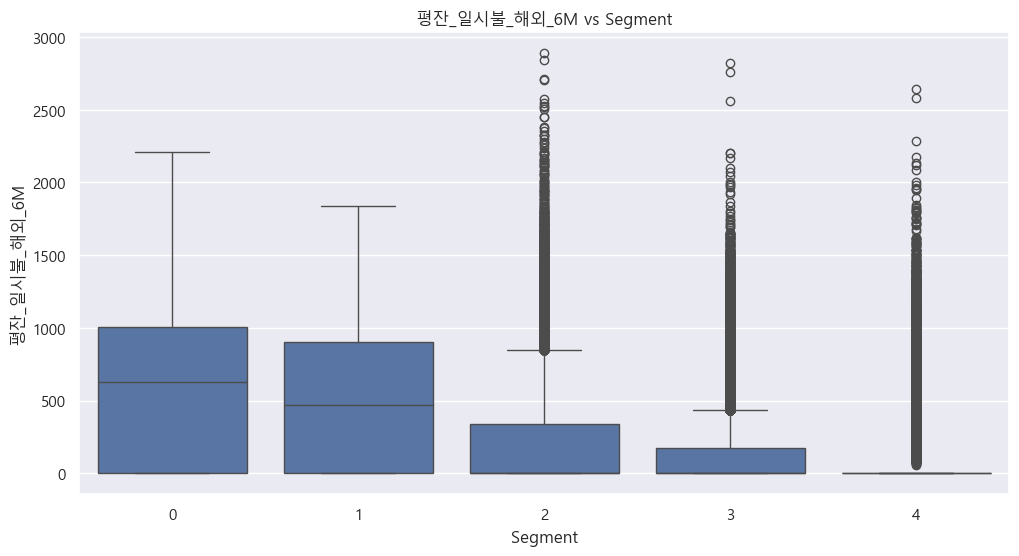

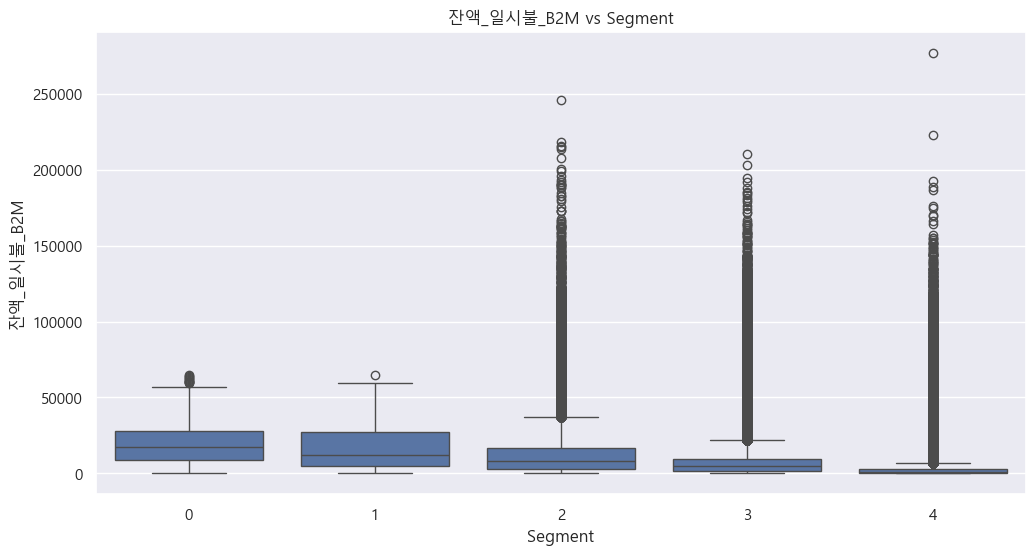

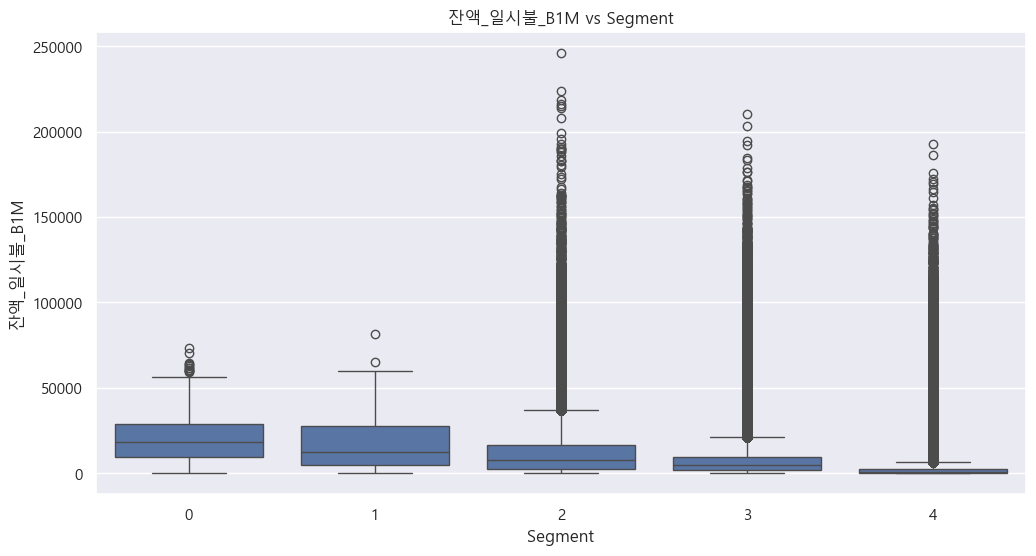

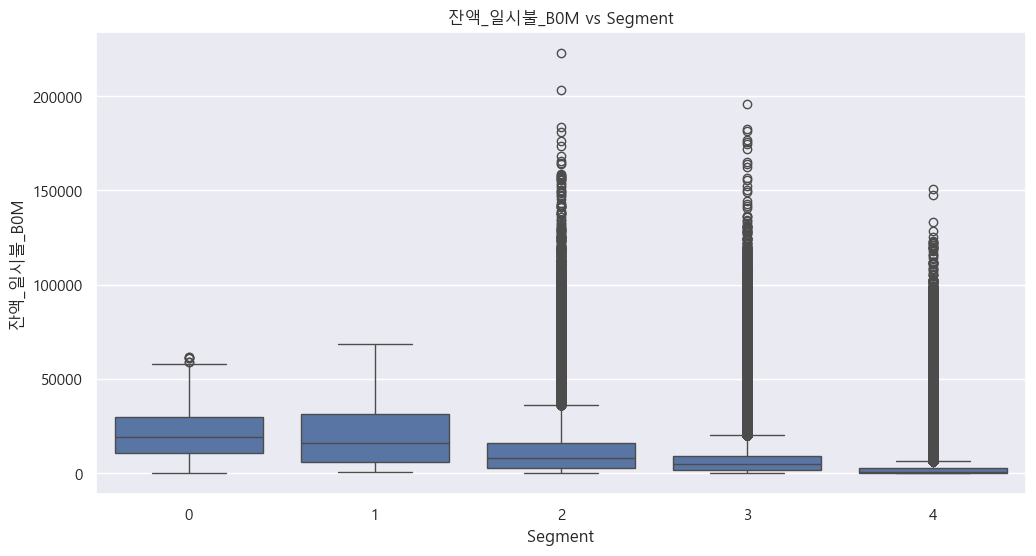

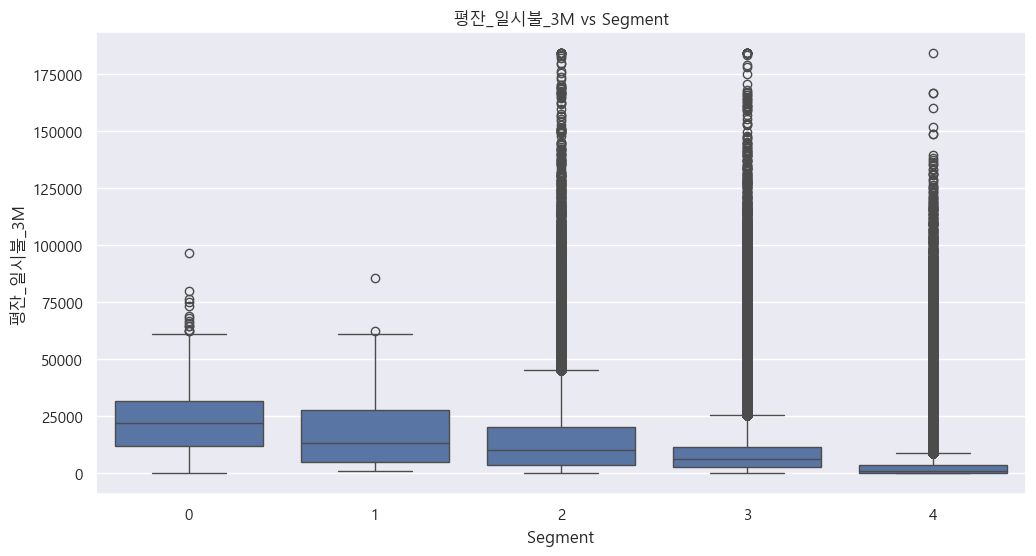

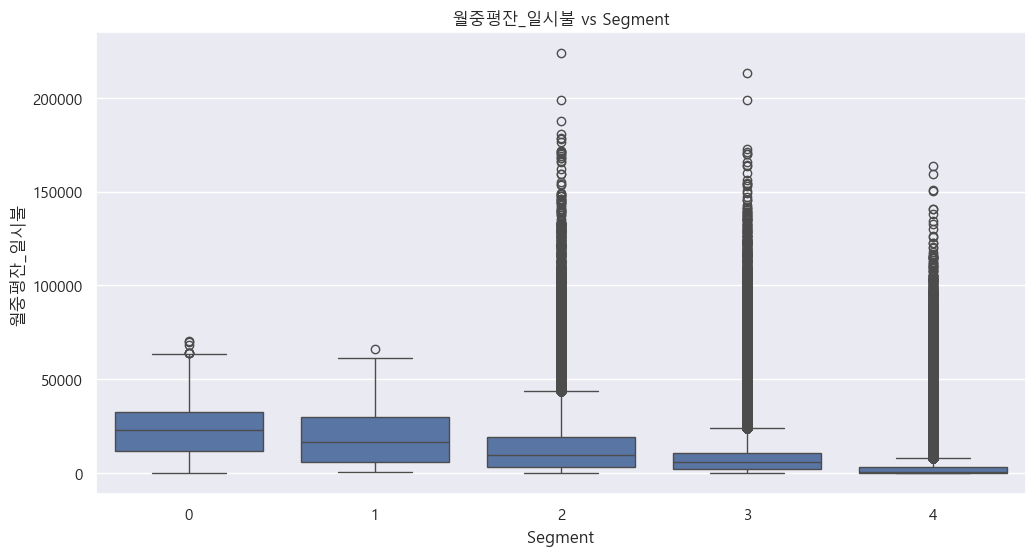

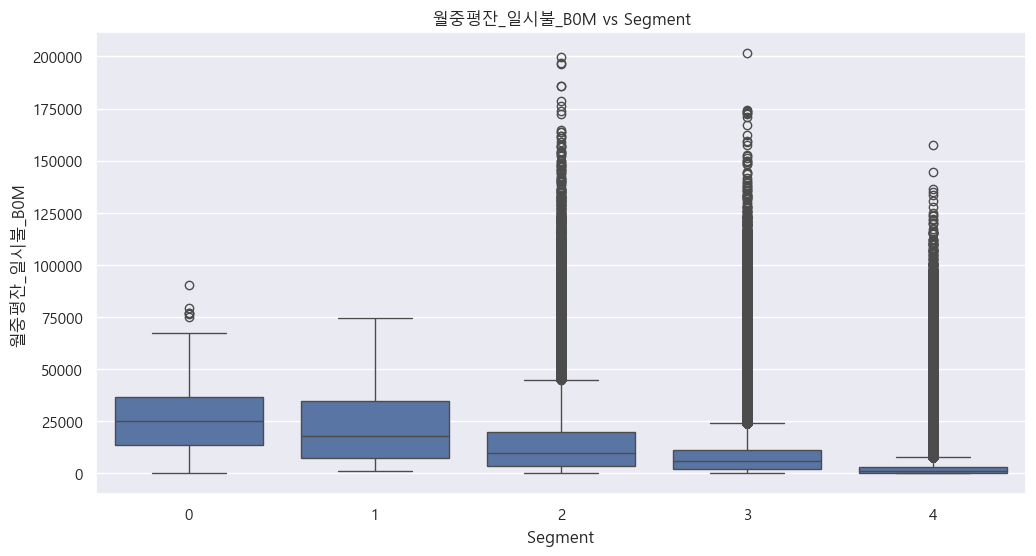

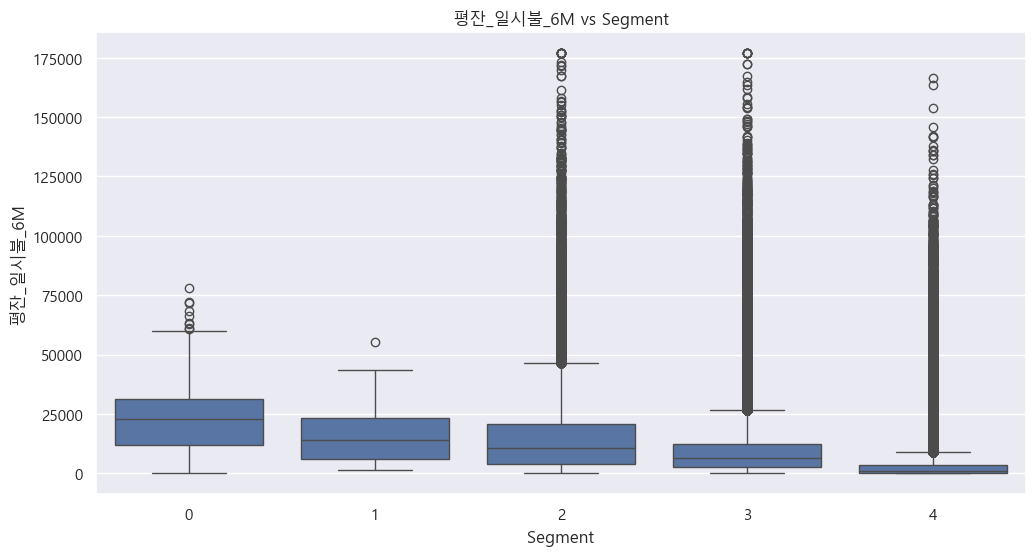

In [8]:
for col in df:
    if col != 'Segment' and pd.api.types.is_numeric_dtype(df[col]):
        sns.boxplot(x=df['Segment'], y=df[col])
        plt.title(f"{col} vs Segment")
        plt.show()
